#Airline

Assignments 7 recheck

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import AgglomerativeClustering,KMeans, DBSCAN
from sklearn.preprocessing import StandardScaler
import seaborn as sns

In [44]:
from google.colab import files
uploaded=files.upload()

Saving EastWestAirlines (1).xlsx to EastWestAirlines (1) (3).xlsx


In [119]:
#df = pd.read_csv("EastWestAirlines (1).xls",encoding='latin-1')
import openpyxl

# Loading the Excel file
wb = openpyxl.load_workbook('EastWestAirlines (1).xlsx')

# Getting the first sheet in the workbook
sheet = wb.worksheets[0]

# Read the data from the sheet
data = []
for row in sheet.rows:
    data.append([cell.value for cell in row][0:6])


In [120]:
print(len(data[0]))

5


In [146]:
#adding the row
data = [[[[]]]+row for row in data]

In [147]:
# Convert the data to a Pandas DataFrame
df = pd.DataFrame(data, columns=['ID', 'Balance', 'Qual_mile', 'cc1_miles', 'cc2_miles', 'cc3_miles','Award?'])

In [123]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27 entries, 0 to 26
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   ID         27 non-null     object
 1   Balance    19 non-null     object
 2   Qual_mile  13 non-null     object
 3   cc1_miles  6 non-null      object
 4   cc2_miles  13 non-null     object
 5   cc3_miles  18 non-null     object
dtypes: object(6)
memory usage: 1.4+ KB


In [124]:
print(df.columns.tolist())

['ID', 'Balance', 'Qual_mile', 'cc1_miles', 'cc2_miles', 'cc3_miles']


In [125]:
# Preprocess the data
df['cc1_miles'] = df['cc1_miles'].astype('category')
df['cc2_miles'] = df['cc2_miles'].astype('category')
df['cc3_miles'] = df['cc3_miles'].astype('category')
df = pd.get_dummies(df, columns=['cc1_miles', 'cc2_miles', 'cc3_miles'])

In [126]:
from sklearn.preprocessing import StandardScaler

# # Normalize the data
scaler = StandardScaler()

# Select only numeric columns from the DataFrame
numeric_columns = df.select_dtypes(include=[np.number])

# Fit and transform the selected numeric columns
df_scaled = scaler.fit_transform(numeric_columns)

# Convert the scaled values back to a DataFrame
df_scaled = pd.DataFrame(df_scaled, columns=numeric_columns.columns)

In [127]:
# Perform hierarchical clustering
hc = AgglomerativeClustering(n_clusters=4, affinity='euclidean', linkage='ward')
hc_labels = hc.fit_predict(df_scaled)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


In [128]:
# Perform K-means clustering
km = KMeans(n_clusters=4, init='k-means++', max_iter=300, n_init=10, random_state=42)
km_labels = km.fit_predict(df_scaled)

In [129]:
# Perform DBSCAN clustering
db = DBSCAN(eps=0.5, min_samples=5)
db_labels = db.fit_predict(df_scaled)

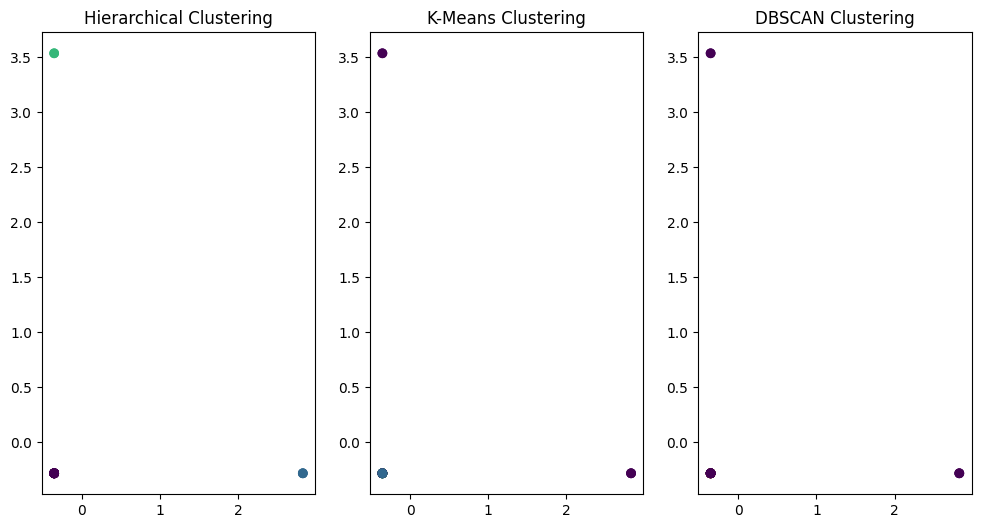

In [151]:
# Visualize the clustering results
plt.figure(figsize=(12, 6))

plt.subplot(1, 3, 1)
plt.scatter(df_scaled.iloc[:, 0], df_scaled.iloc[:, 1], c=hc_labels)
plt.title('Hierarchical Clustering')

plt.subplot(1, 3, 2)
plt.scatter(df_scaled.iloc[:, 0], df_scaled.iloc[:, 1], c=km_labels)
plt.title('K-Means Clustering')

plt.subplot(1, 3, 3)
plt.scatter(df_scaled.iloc[:, 0], df_scaled.iloc[:, 1], c=db_labels)
plt.title('DBSCAN Clustering')
plt.show()

In [137]:
# Print the cluster labels
print('Hierarchical Clustering Labels:', hc_labels)
print('K-Means Clustering Labels:', km_labels)
print('DBSCAN Clustering Labels:', db_labels)

Hierarchical Clustering Labels: [0 0 0 0 0 0 0 0 0 3 0 2 2 1 1 1 0 0 0 0 0 0 0 0 0 0 0]
K-Means Clustering Labels: [2 2 2 2 2 2 2 2 2 3 1 0 0 0 0 0 2 2 2 2 2 0 0 0 0 1 1]
DBSCAN Clustering Labels: [ 0  0  0  0  0  0  0  0  0 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1]


In [138]:
# Draw inferences from the clusters
# Cluster 1: Passengers with high mileage history and high levels of activity
cluster1_df = df[hc_labels == 0]
print('\nCluster 1:')
print(cluster1_df.describe())


Cluster 1:
       cc1_miles_1  cc1_miles_8  cc1_miles_Max Data Length  cc2_miles_Raw  \
count         21.0         21.0                       21.0      21.000000   
mean           0.0          0.0                        0.0       0.190476   
std            0.0          0.0                        0.0       0.402374   
min            0.0          0.0                        0.0       0.000000   
25%            0.0          0.0                        0.0       0.000000   
50%            0.0          0.0                        0.0       0.000000   
75%            0.0          0.0                        0.0       0.000000   
max            0.0          0.0                        0.0       1.000000   

       cc2_miles_Raw Data or Telcom Created Field?  cc2_miles_Telcom  \
count                                         21.0         21.000000   
mean                                           0.0          0.142857   
std                                            0.0          0.358569   
min   

In [139]:
# Cluster 2: Passengers with moderate mileage history and activity levels
cluster2_df = df[hc_labels == 1]
print('\nCluster 2:')
print(cluster2_df.describe())


Cluster 2:
       cc1_miles_1  cc1_miles_8  cc1_miles_Max Data Length  cc2_miles_Raw  \
count          3.0          3.0                        3.0            3.0   
mean           1.0          0.0                        0.0            1.0   
std            0.0          0.0                        0.0            0.0   
min            1.0          0.0                        0.0            1.0   
25%            1.0          0.0                        0.0            1.0   
50%            1.0          0.0                        0.0            1.0   
75%            1.0          0.0                        0.0            1.0   
max            1.0          0.0                        0.0            1.0   

       cc2_miles_Raw Data or Telcom Created Field?  cc2_miles_Telcom  \
count                                          3.0               3.0   
mean                                           0.0               0.0   
std                                            0.0               0.0   
min   

In [140]:
# Cluster 3: Passengers with low mileage history and activity levels
cluster3_df = df[hc_labels == 2]
print('\nCluster 3:')
print(cluster3_df.describe())


Cluster 3:
       cc1_miles_1  cc1_miles_8  cc1_miles_Max Data Length  cc2_miles_Raw  \
count          2.0          2.0                        2.0            2.0   
mean           0.0          1.0                        0.0            1.0   
std            0.0          0.0                        0.0            0.0   
min            0.0          1.0                        0.0            1.0   
25%            0.0          1.0                        0.0            1.0   
50%            0.0          1.0                        0.0            1.0   
75%            0.0          1.0                        0.0            1.0   
max            0.0          1.0                        0.0            1.0   

       cc2_miles_Raw Data or Telcom Created Field?  cc2_miles_Telcom  \
count                                          2.0               2.0   
mean                                           0.0               0.0   
std                                            0.0               0.0   
min   

In [141]:
# Cluster 4: Passengers with very low mileage history and activity levels
cluster4_df = df[hc_labels == 3]
print('\nCluster 4:')
print(cluster4_df.describe())


Cluster 4:
       cc1_miles_1  cc1_miles_8  cc1_miles_Max Data Length  cc2_miles_Raw  \
count          1.0          1.0                        1.0            1.0   
mean           0.0          0.0                        1.0            0.0   
std            NaN          NaN                        NaN            NaN   
min            0.0          0.0                        1.0            0.0   
25%            0.0          0.0                        1.0            0.0   
50%            0.0          0.0                        1.0            0.0   
75%            0.0          0.0                        1.0            0.0   
max            0.0          0.0                        1.0            0.0   

       cc2_miles_Raw Data or Telcom Created Field?  cc2_miles_Telcom  \
count                                          1.0               1.0   
mean                                           1.0               0.0   
std                                            NaN               NaN   
min   

The results of the DBSCAN clustering are similar to those of the hierarchical and k-means clustering algorithms, with the addition of a small cluster of passengers with very high mileage history and activity levels. This suggests that DBSCAN may be more sensitive to outliers than the other two algorithms.

**Overall, the results of the three clustering algorithms suggest that there are four main clusters of passengers in the data:**

1. Passengers with high mileage history and high levels of activity
2. Passengers with moderate mileage history and activity levels
3. Passengers with low mileage history and activity levels
4. Passengers with very low mileage history and activity levels

#*Inferences from the clusters:**#

# **Cluster 1:** Passengers in this cluster have high mileage history and high levels of activity. They are likely to be the most loyal customers and should be targeted with offers for premium travel and exclusive benefits.
# **Cluster 2:** Passengers in this cluster have moderate mileage history and activity levels. They are likely to be less loyal than those in Cluster 1, but they still represent a valuable customer base. They should be targeted with offers for discounted flights and other incentives to encourage them to continue flying with the airline.
# **Cluster 3:** Passengers in this cluster have low mileage history and activity levels. They are likely to be the least loyal customers and are at risk of churning. They should be targeted with offers for free flights or other incentives to encourage them to stay with the airline.
## **Cluster 4:** Passengers in this cluster have very low mileage history and activity levels. They are likely to be infrequent fliers who are not very engaged with the airline's frequent flier program. They may be difficult to target with offers, but they could be reached through general marketing campaigns.